# So Far...

We've gone over a lot of stuff so far and you all have been doing great with everything I've thrown at you

# Measures of Descriptive Statistics

All descriptive statistics are either measures of central tendency or measures of variability, also known as measures of dispersion. 

- Measures of **central tendency** focus on the **average or middle values** of data sets.
- Measures of **variability** focus on the **dispersion** of data. 

These two measures use graphs, tables, and general discussions to help people understand the meaning of the analyzed data.

# Central Tendency

Measures of central tendency describe the center position of a distribution for a data set. A person analyzes the frequency of each data point in the distribution and describes it using the **mean**, **median**, or **mode**, which measures the most common patterns of the analyzed data set.

In [ ]:
from scipy import stats
import numpy as np
#make random data
nums=np.random.normal(0, 10, 1000) # (mean, standard deviation, shape of array)

import matplotlib.pyplot as plt

f, ax1 = plt.subplots()
ax1.hist(nums, bins='auto')
ax1.set_title('probability density (random)')
plt.tight_layout()


In [ ]:
f, ax1 = plt.subplots()
ax1.hist(nums, bins='auto')
ax1.set_title('probability density (random)')
plt.tight_layout()
ax1.plot([np.mean(nums)]*2,[0,100],'r')
#ax1.plot([np.median(nums)]*2,[0,100],'g')
# ax1.plot([stats.mode(nums)[0]]*2,[0,100],'g')
plt.show()

print("The Mean is: ",np.mean(nums))
print("The Mode is: ",stats.mode(nums))
print("The Median is: ",np.median(nums))

# Dispersion 

Measures of variability, or the measures of spread, aid in analyzing how spread-out the distribution is for a set of data. 

For example, while the measures of central tendency may give a person the average of a data set, it does not describe **how the data is distributed within the set**. So, while the average of the data may be 65 out of 100, there can still be data points at both 1 and 100. 

Measures of variability help communicate this by describing the shape and spread of the data set. Examples of measures of variability:
- Range
- Quartiles
- Standard deviation
- Variance

## Range

The range is the simplest measure of variability to calculate, and one you have probably encountered many times in your life. The range is simply the highest score minus the lowest score

Consider the following data set: 
- 5, 19, 24, 62, 91, 100
- The range of that data set is 95, which is calculated by subtracting the lowest number (5) in the data set from the highest (100).

In [ ]:
max_nums = max(nums)
min_nums = min(nums)
range_nums = max_nums-min_nums
print(max_nums)
print(min_nums)
print("The Range is :", range_nums)


## Standard deviation

The standard deviation is also a measure of the spread of your observations, but is a statement of how much your data deviates from a typical data point. That is to say, the standard deviation summarizes how much your data differs from the mean. This relationship to the mean is apparent in standard deviation’s calculation. 

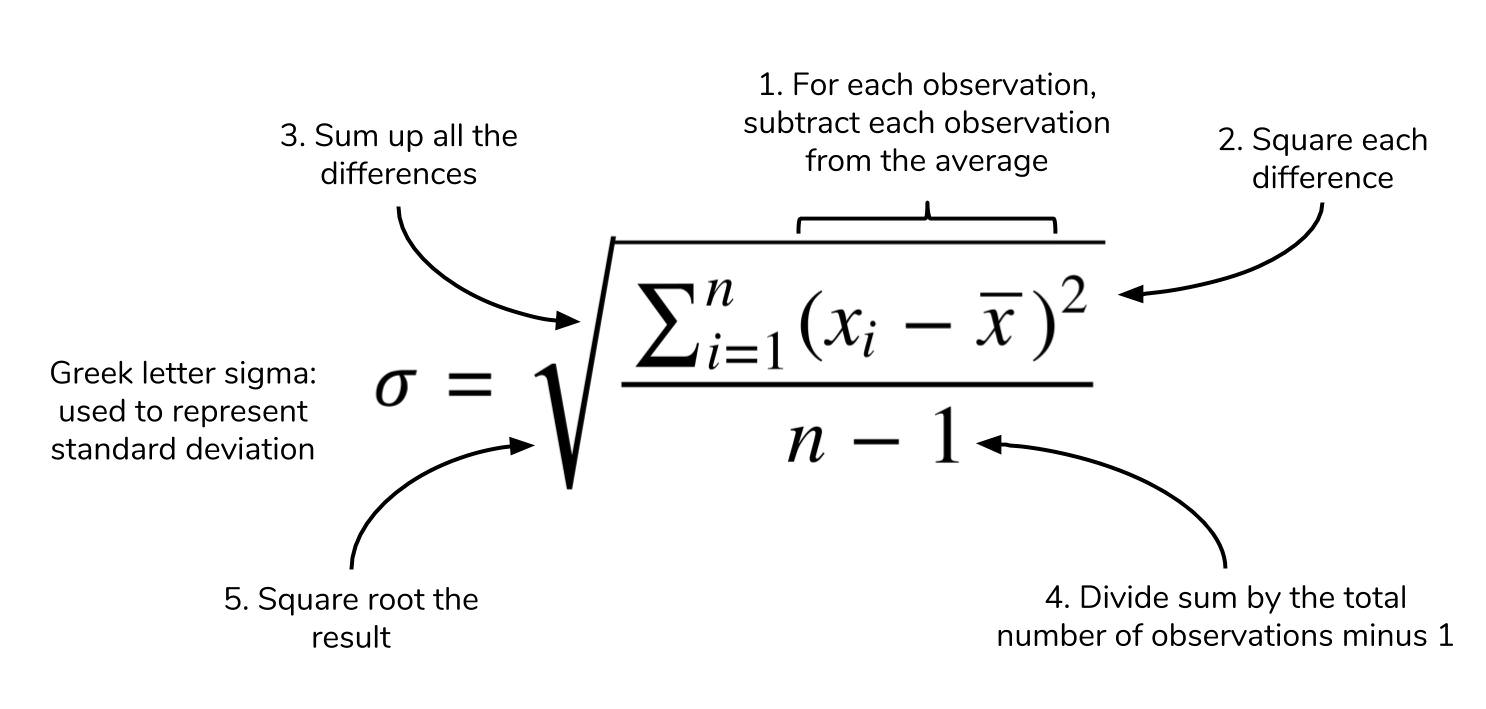

In [ ]:
print(np.std(nums))

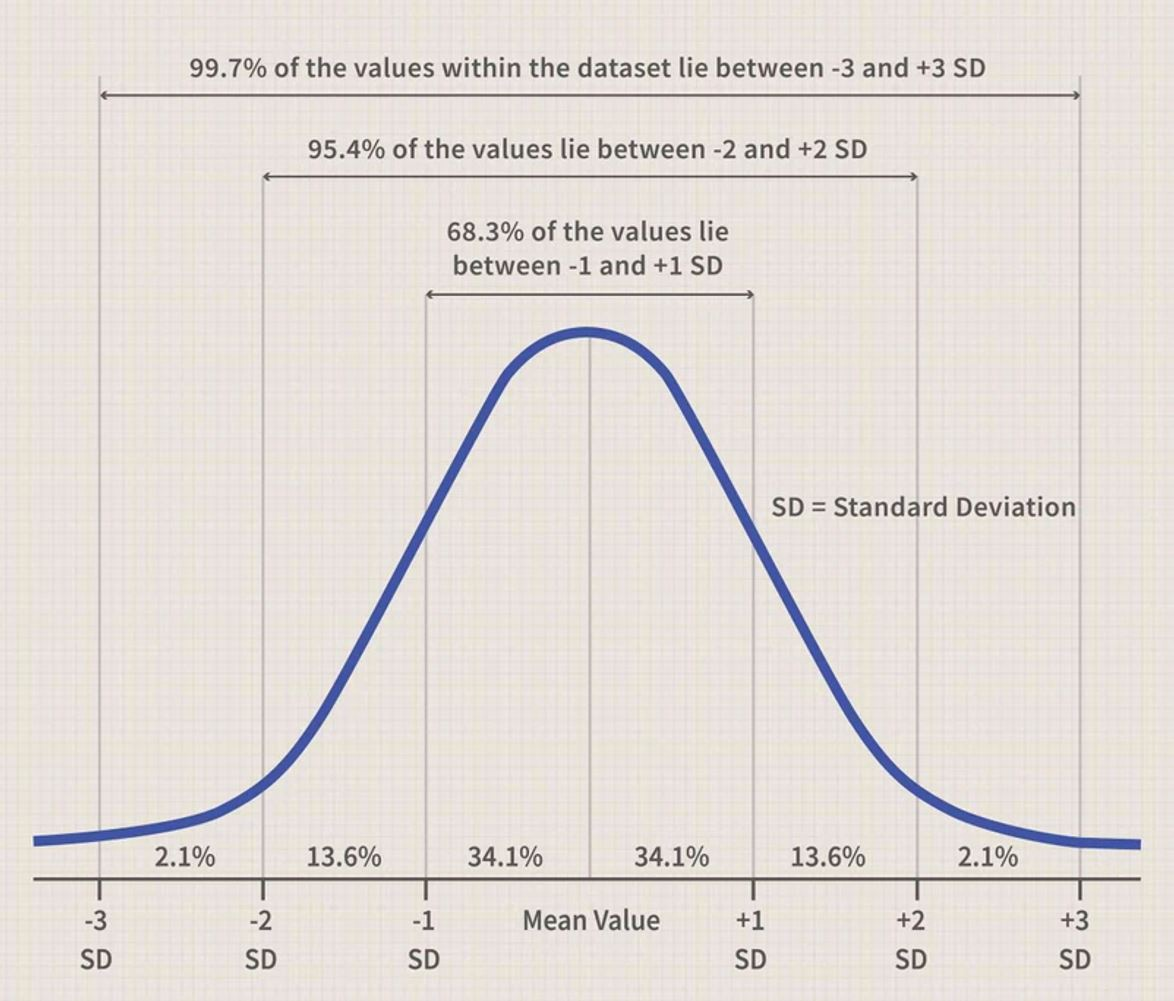

In a normal distribution, approximately 68% of data falls within +/-1 SD of the mean. Approximately 95% falls within +/-2 SD

## Variance

Often, standard deviation and variance are lumped together for good reason. The following is the equation for variance, does it look familiar?

The variance measures the average of the squared differences between each point and the mean, meaning variance is the square of standard deviation. Variance is much larger

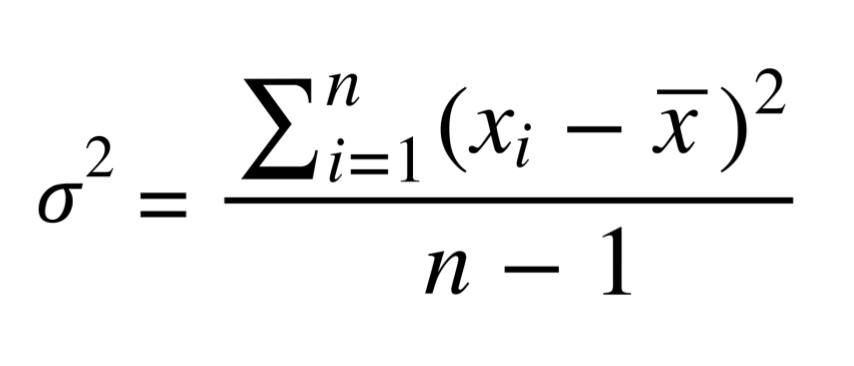

In [ ]:
print(np.var(nums))

# Shape

The skewness is a parameter to measure the symmetry of a data set and the kurtosis to measure how heavy its tails are compared to a normal distribution, see for example here. 

In [ ]:
import numpy as np
from scipy.stats import kurtosis, skew, skewnorm

n = 10000
start = 0
width = 20

a = 0
data_normal = skewnorm.rvs(size=n, a=a, loc = start, scale=width)

a = 3
data_skew = skewnorm.rvs(size=n, a=a, loc = start, scale=width)

import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(data_normal, bins='auto')
ax1.set_title('probability density (random)')
ax2.hist(data_skew, bins='auto')
ax2.set_title('(your dataset)')
plt.tight_layout()

sig1 = data_normal
print("mean : ", np.mean(sig1))
print("var  : ", np.var(sig1))
print("skew : ", skew(sig1))
print("kurt : ", kurtosis(sig1))

**Skewness** measures the asymmetry of a distribution around its mean:
- Zero skewness → perfectly symmetric (mean = median = mode).
- Positive skewness (right-skewed) --> long tail on the right, mean > median > mode.
- Negative skewness (left-skewed) --> long tail on the left, mean < median < mode

**Kurtosis** measures the tailedness and peakedness of a distribution relative to a normal distribution:

- Mesokurtic (excess kurtosis ≈ 0) --> similar to normal distribution.
- Leptokurtic (> 0) --> sharper peak, heavier tails (more extreme values).
- Platykurtic (< 0) --> flatter peak, lighter tails.

Important because many types of analyses assume that the data is normally distributed.

# Correlation/Regression

In [ ]:
import pandas as pd
path_to_data = 'https://raw.githubusercontent.com/BlohmLab/NSCI801-QuantNeuro/master/Practice/rois.csv'
data_in = pd.read_csv(path_to_data).values
plt.scatter(data_in[:,1],data_in[:,2])
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18)
plt.show()

A scatter plot is a two dimensional data visualization that shows the relationship between two numerical variables — one plotted along the x-axis and the other plotted along the y-axis. 

Matplotlib is a Python 2D plotting library that contains a built-in function to create scatter plots the matplotlib.pyplot.scatter() function. 

**ALWAYS PLOT YOUR RAW DATA**

Visual Interpretation:

- This scatter plot shows a positive correlation (as X increases, Y increases)
- Points form an upward-sloping cloud
- Not a perfect relationship - there's variability around the trend

# Pearson Correlation Coefficient

Correlation measures the extent to which two variables are related. The Pearson correlation coefficient is used to measure the strength and direction of the linear relationship between two variables. 

This coefficient is calculated by dividing the covariance of the variables by the product of their standard deviations and has a value between +1 and -1, where 1 is a perfect positive linear correlation, 0 is no linear correlation, and −1 is a perfect negative linear correlation.

We can obtain the correlation coefficients of the variables of a dataframe by using the .corr() method. By default, Pearson correlation coefficient is calculated; however, other correlation coefficients can be computed such as, Kendall or Spearman.

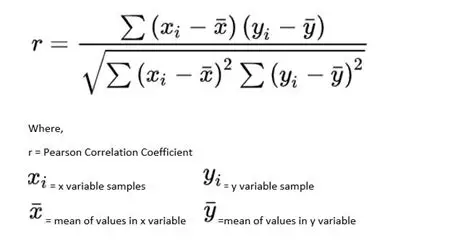

## Assumptions

The assumptions for Pearson correlation coefficient are as follows:

1. **LEVEL OF MEASUREMENT** (Continuous Variables) - Both variables should be measured on a continuous scale (can take any value within a range), not categorical or ordinal. If one or both of the variables are ordinal in measurement, then a Spearman correlation could be conducted instead.

2. **RELATED PAIRS** - Each observation must have values for BOTH variables - you need complete pairs of measurements from the same unit. So if the correlation was between weight and height, then each observation used should have both a weight and a height value.

3. **ABSENCE OF OUTLIERS** - No extreme values that lie far from the rest of the data (typically defined as more than ±3.29 standard deviations from the mean). Having an outlier can skew the results of the correlation by pulling the line of best fit formed by the correlation too far in one direction or another.

4. **NORMALITY OF VARIABLES** - Both X and Y should be approximately normally distributed (bell-curve shaped) when considered separately.
 
5. **LINEARITY** - The relationship between X and Y should follow a straight line, not a curve.

6. **HOMOSCEDASTICITY** - The variability (spread) of Y should be roughly constant across all values of X. On a scatter plot, points should form a "tube" shape, not a "cone."

In [ ]:
# Calculate the Pearson correlation coefficient between variables
correlation = np.corrcoef(data_in[:,1],data_in[:,2]) 
print(correlation)

#OR

from scipy.stats import pearsonr
correlation, p_value = pearsonr(data_in[:,1], data_in[:,2]) # also gives you the p-value for significance testing
print(f"r = {correlation}, p = {p_value}") 

**Code Explanation:** The code is calculating the Pearson correlation between two columns of your data, and the answer is r = 0.455 (moderate positive correlation). The matrix format just shows all pairwise correlations, including the trivial "each variable with itself" (which is always 1.0).

A rule of thumb for interpreting the size of the correlation coefficient is the following:
- 1–0.8 → Very strong
- 0.799–0.6 → Strong
- 0.599–0.4 → Moderate
- 0.399–0.2 → Weak
- 0.199–0 → Very Weak

**CORRELATION DOES NOT IMPLY CAUSATION**

# Regression

A statistical method that helps us to model the relationship between dependent variables and one or more independent variables.

This analysis helps us to understand the change in the value of our target variable corresponding to an independent variable when other variables are held fixed.

It answers questions like:

- "If I know X, what value of Y should I expect?"
- "How much does Y change when X changes by one unit?"

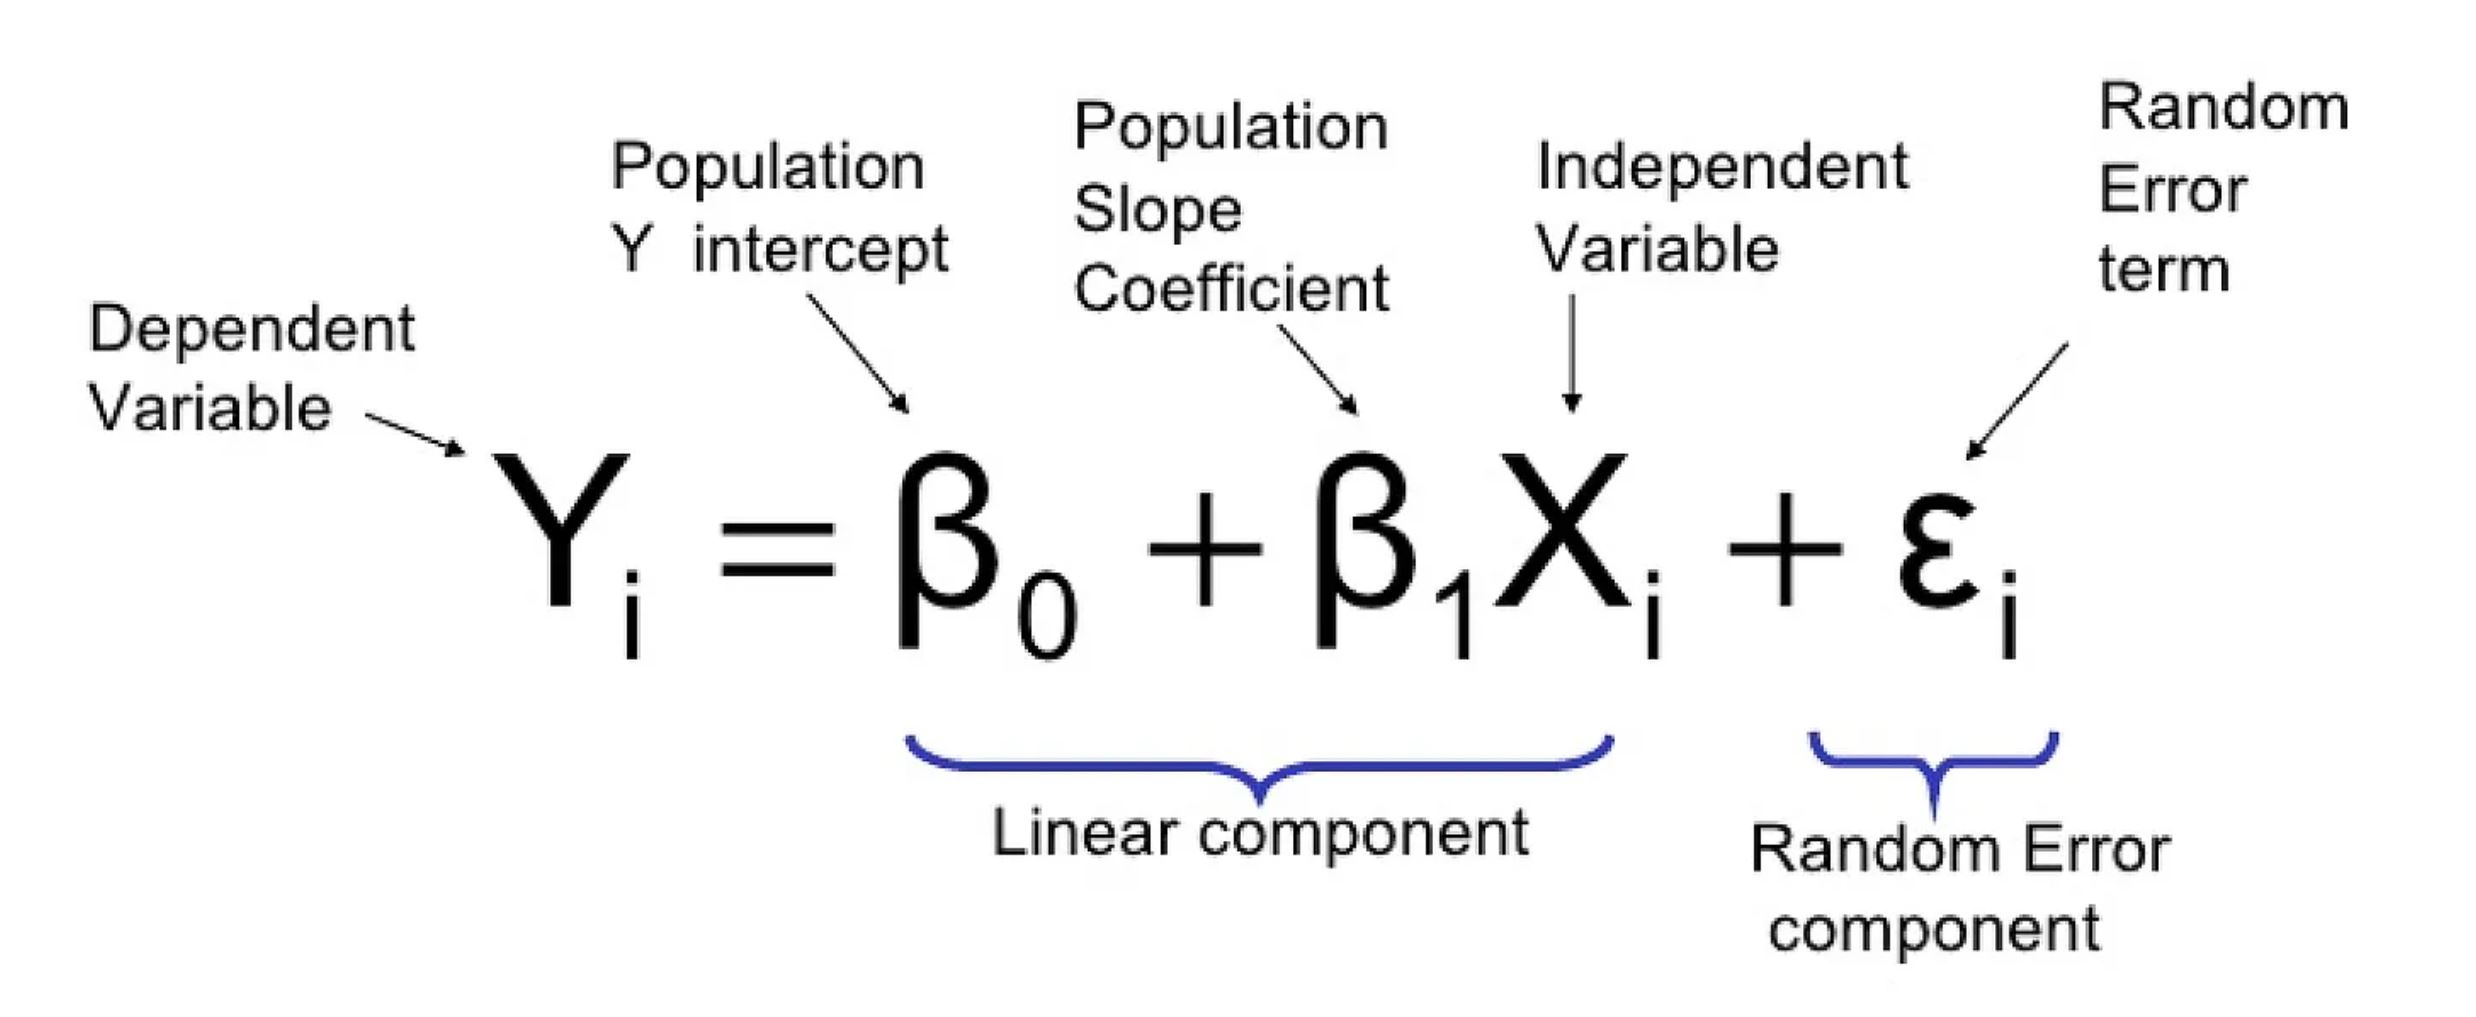

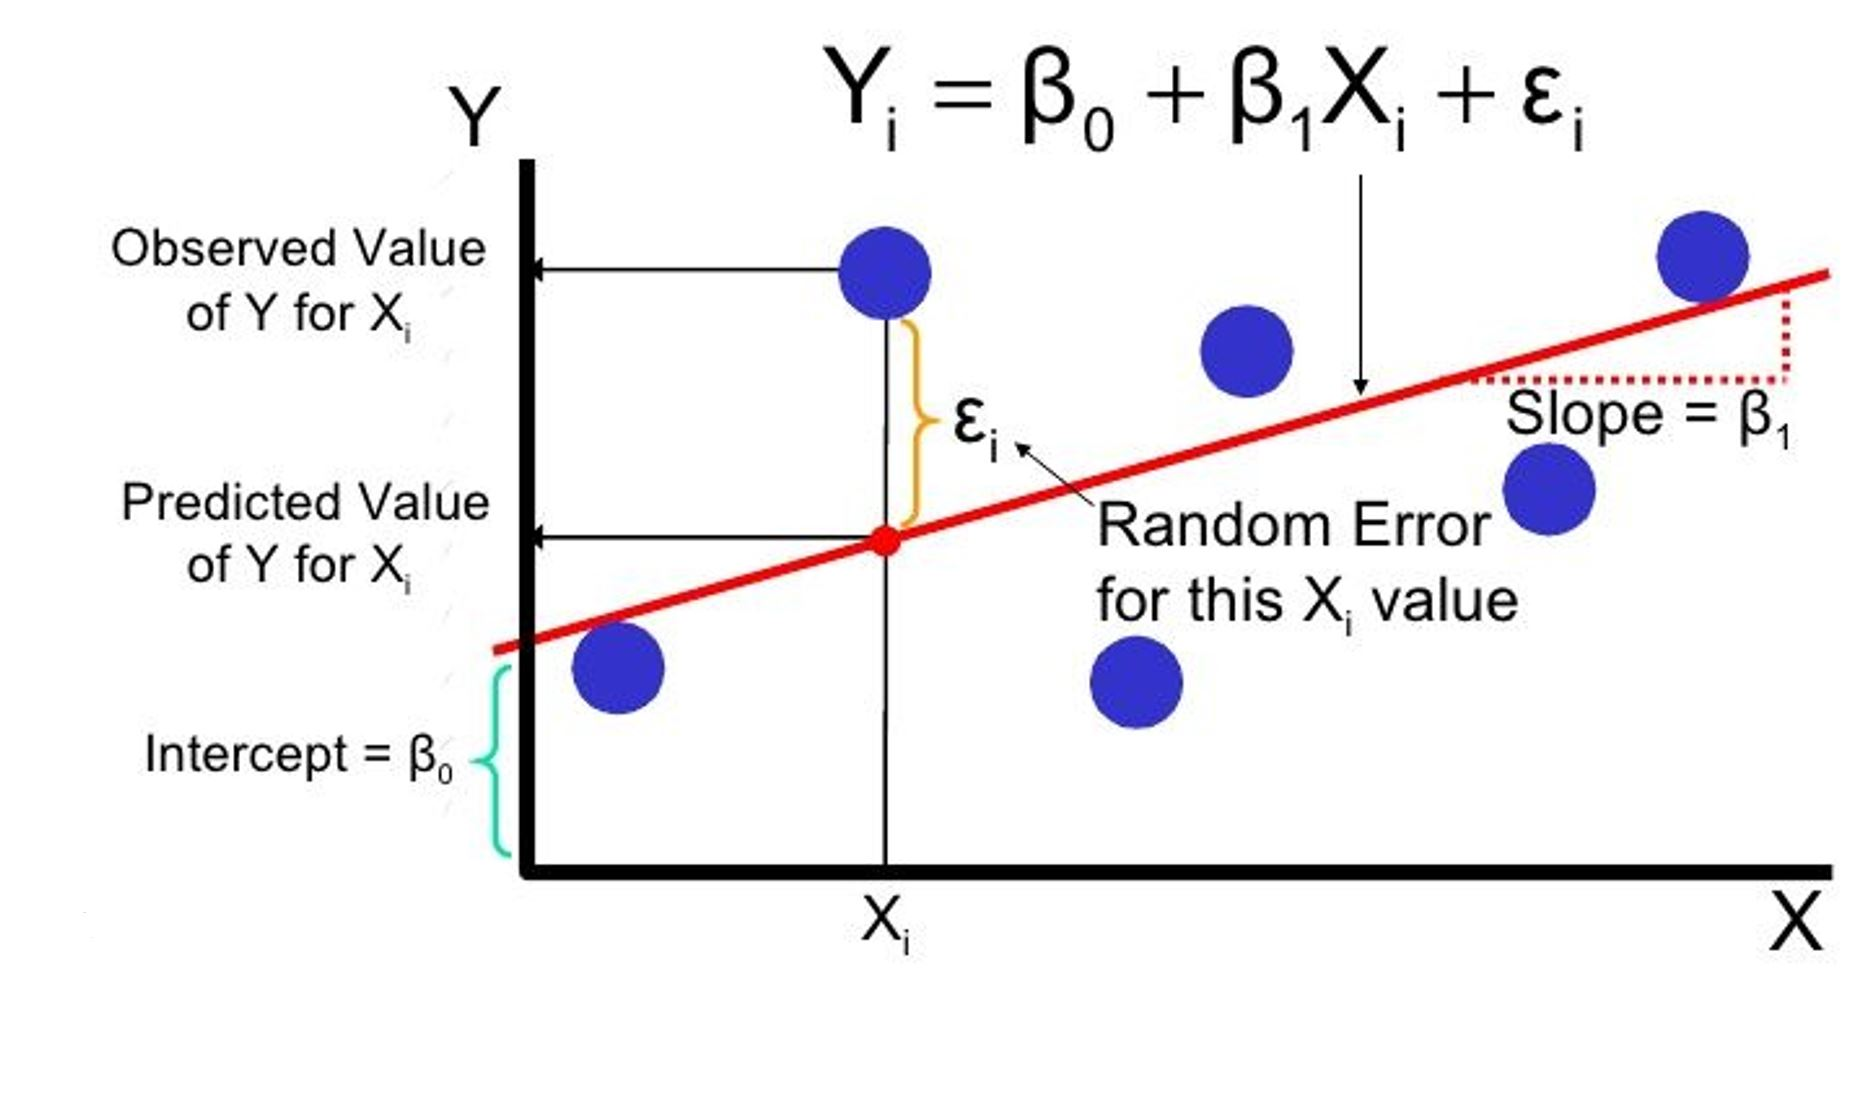

### Goodness of Fit (R^2 measure)
R-squared (the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable.

In other words, R-squared helps us analyze how well our regression model fits the data.

R-squared can take any value between 0 to 1. **Ex.** An R-squared value of 0.6 means that 60% of the variations observed in the target variable are explained by the regression model.

### Line of best fit
This is commonly found using the "Least Squares" method, which minimizes the sum of squared distances from point values to their predicted value.

Using the line of best fit, we can then calculate R-squared:
    
    R^2 = 1 - Unexplained variance/Total variance

A note about sample size.  In Linear regression the sample size rule of thumb is that the regression analysis requires at least 20 cases per independent variable in the analysis.

### Assumptions

Linear regression has five key assumptions:

1. **Linear relationship** - The relationship between X and Y should follow a straight line, not a curve.
2. **Multivariate normality** - The residuals (prediction errors) should be normally distributed. Note: this is NOT saying X or Y must be normal - it's the errors that matter!
3. **No or little multicollinearity** -  Predictor variables (X's) should not be too highly correlated with each other. They should provide independent information.
4. **No auto-correlation** - Residuals (errors) should be independent of each other. One error shouldn't predict the next error.
5. **Homoscedasticity** - The variance of residuals should be constant across all levels of the predictor. In other words, prediction errors should have the same spread everywhere.

In [ ]:
import statsmodels.api as sm
import numpy as np

# Your data
X = data_in[:,1]  # predictor
y = data_in[:,2]  # outcome

# Add intercept term (CRITICAL!)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Get predictions
predictions = model.predict(X)

# Display results
print(model.summary())

# You can also access specific values:
print(f"\nR-squared: {model.rsquared:.3f}")
print(f"Coefficients: {model.params}")
print(f"P-values: {model.pvalues}")

The Good:
- Statistically significant relationship (p < 0.001)
- Residuals are normally distributed
- Reasonable sample size (n = 353)
- Clear, interpretable coefficients

The Concerning:
- Autocorrelation present (DW = 0.660)
- High condition number (37,400)
- Modest explanatory power (R² = 0.21) - lots of unexplained variance

# Another Example

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
# import seaborn as seabornInstance 
#from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

p1 = 'https://raw.githubusercontent.com/BlohmLab/NSCI801-QuantNeuro/master/Practice/weather_data.csv'
dataset = pd.read_csv(p1)

dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

In [ ]:
# Reshape arrays to format (n_samples, 1)
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

In [ ]:
regressor = LinearRegression()  
regressor.fit(X, y) #training the algorithm
y_pred = regressor.predict(X)
plt.scatter(X, y,  color='gray')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.show()

# Another Example

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt


x_vals1 = np.random.randint(-100,-50,100)
y_vals1 = np.random.randint(-100,-50,100)
x_vals2 = np.random.randint(35,100,100)
y_vals2 = np.random.randint(60,100,100)

x_t = np.concatenate((x_vals1,x_vals2))
y_t = np.concatenate((y_vals1,y_vals2))

plt.scatter(x_t, y_t)
plt.show()


In [ ]:
regressor = LinearRegression().fit((x_t).reshape(-1,1),(y_t).reshape(-1,1))  
y_pred = regressor.predict(x_t.reshape(-1,1))
plt.scatter(x_t, y_t)
plt.plot((x_t).reshape(-1,1), y_pred, color='red', linewidth=2)
plt.show()

Whats wrong with this??

### KEY TAKEAWAY:

Regression = Building a prediction equation


It tells you:

- Which variables matter (p-values)
- How much they matter (coefficients)
- What to predict for new cases (plug into equation)
- How well your model works (R²)

Regression is about prediction and understanding relationships quantitatively. It's one of the most useful tools in statistics because it lets you move from "these things are related" (correlation) to "I can predict Y from X with this much accuracy" (regression).

# The Logic of Hypothesis Testing

### The Logic of Hypothesis Testing 

As just stated, the logic of hypothesis testing in statistics involves four steps:
- **State the Hypothesis:** We state a hypothesis (guess) about a population. Usually the hypothesis concerns the value of a population parameter.
- **Define the Decision Method:** We define a method to make a decision about the hypothesis. The method involves sample data.
- **Gather Data:** We obtain a random sample from the population.
- **Make a Decision:** We compare the sample data with the hypothesis about the population. Usually we compare the value of a statistic computed from the sample data with the hypothesized value of the population parameter.

If the data are consistent with the hypothesis, we conclude that the hypothesis is reasonable. **NOTE:** We do not conclude it is right, but reasonable! **AND:** We actually do this by rejecting the opposite hypothesis (called the NULL hypothesis). More on this later.
If there is a big discrepency between the data and the hypothesis we conclude that the hypothesis was wrong.

We expand on those steps in this section:

### First Step: State the Hypothesis

Stating the hypothesis actually involves stating two opposing hypotheses about the value of a population parameter.

Example: Suppose we have are interested in the effect of prenatal exposure of alcohol on the birth weight of rats. Also, suppose that we know that the mean birth weight of the population of untreated lab rats is 18 grams.

Here are the two opposing hypotheses:

**The Null Hypothesis (Ho)**. 
- This hypothesis states that the treatment has no effect. 
- For our example, we formally state: The null hypothesis (Ho) is that prenatal exposure to alcohol has no effect on the birth weight for the population of lab rats. The birthweight will be equal to 18 grams.


**The Alternative Hypothesis (H1)**. This hypothesis states that the treatment does have an effect. For our example, we formally state:
- The alternative hypothesis (H1) is that prenatal exposure to alcohol has an effect on the birth weight for the population of lab rats. The birthweight will be different than 18 grams.

### Second Step: Define the Decision Method

We must define a method that lets us decide whether the sample mean is different from the hypothesized population mean. The method will let us conclude whether (reject null hypothesis) or not (accept null hypothesis) the treatment (prenatal alcohol) has an effect (on birth weight).
We will go into details later. 

### Third Step: Gather Data.

Now we gather data. We do this by obtaining a random sample from the population.

Example: A random sample of rats receives daily doses of alcohol during pregnancy. At birth, we measure the weight of the sample of newborn rats. The weights, in grams, are shown in the table.

We calculate the mean birth weight.

Experiment 1
Sample Mean = 13

### Fourth Step: Make a Decision

We make a decision about whether the mean of the sample is consistent with our null hypothesis about the population mean.
If the data are consistent with the null hypothesis we conclude that the null hypothesis is reasonable.
Formally: we do not reject the null hypothesis.

If there is a big discrepency between the data and the null hypothesis we conclude that the null hypothesis was wrong.
Formally: we reject the null hypothesis.

**Example:** 

We compare the observed mean birth weight with the hypothesized value, under the null hypothesis, of 18 grams.

If a sample of rat pups which were exposed to prenatal alcohol has a birth weight "near" 18 grams we conclude that the treatement does not have an effect.
Formally: We do not reject the null hypothesis that prenatal exposure to alcohol has no effect on the birth weight for the population of lab rats.

If our sample of rat pups has a birth weight "far" from 18 grams we conclude that the treatement does have an effect.
Formally: We reject the null hypothesis that prenatal exposure to alcohol has no effect on the birth weight for the population of lab rats.

For this example, we would probably decide that the observed mean birth weight of 13 grams is "different" than the value of 18 grams hypothesized under the null hypothesis.
Formally: We reject the null hypothesis that prenatal exposure to alcohol has no effect on the birth weight for the population of lab rats.

# Statistical significance

### Understanding Statistical Significance
Statistical significance is a determination about the null hypothesis, which hypothesizes that the results are due to chance alone. A data set provides statistical significance when the p-value is sufficiently small.

When the p-value is large, then the results in the data are explainable by chance alone, and the data are deemed consistent with (while not proving) the null hypothesis.

When the p-value is sufficiently small (e.g., 5% or less), then the results are not easily explained by chance alone, and the data are deemed inconsistent with the null hypothesis; in this case the null hypothesis of chance alone as an explanation of the data is rejected in favor of a more systematic explanation

**Ex.** A p-value < 0.05 means "if there were truly no difference, we'd expect to see a result this extreme only 5% of the time by chance alone"

**p-value** - a measure of the probability that an observed difference could have occurred just by random chance (under the assumption that the null hypothesis is correct). The lower the p-value, the greater the statistical significance of the observed results.

In [ ]:
from scipy.stats import ttest_ind

for i in range(100):
    vals1 = np.random.rand(100)
    vals2 = np.random.rand(100)
    if ttest_ind(vals1,vals2)[1]<0.05:
        print(ttest_ind(vals1,vals2))

**Code Explanation:** Runs 100 independent t-tests comparing two sets of random numbers drawn from the same distribution. Since both vals1 and vals2 come from np.random.rand(100) (uniform distribution from 0 to 1), there's no real difference between them—any differences are purely due to random chance.

Despite there being no true effect, you'll get a significant result 5% of the time

When you run 100 tests on random data, you'd expect roughly 5 false positives (5% of 100)
These are Type I errors—falsely rejecting the null hypothesis when it's actually true


**IMPORTANT:**
If you test enough random data, you'll eventually find "significant" results purely by chance. This is why fields like genomics use much stricter thresholds (like p < 0.000001) when running thousands of tests.

# Multiple Comparisons

Multiple comparisons arise when a statistical analysis involves multiple simultaneous statistical tests, each of which has a potential to produce a "discovery." A stated confidence level generally applies only to each test considered individually, but often it is desirable to have a confidence level for the whole family of simultaneous tests. Failure to compensate for multiple comparisons can have important real-world consequences, as illustrated by the following examples:

Suppose the treatment is a new way of teaching writing to students, and the control is the standard way of teaching writing. Students in the two groups can be compared in terms of grammar, spelling, organization, content, and so on. As more attributes are compared, it becomes increasingly likely that the treatment and control groups will appear to differ on at least one attribute due to random sampling error alone.
Suppose we consider the efficacy of a drug in terms of the reduction of any one of a number of disease symptoms. As more symptoms are considered, it becomes increasingly likely that the drug will appear to be an improvement over existing drugs in terms of at least one symptom.

# Different Test Statistics

A test statistic is a random variable that is calculated from sample data and used in a hypothesis test. You can use test statistics to determine whether to reject the null hypothesis. The test statistic compares your data with what is expected under the null hypothesis.

A test statistic measures the degree of agreement between a sample of data and the null hypothesis. Its observed value changes randomly from one random sample to a different sample. A test statistic contains information about the data that is relevant for deciding whether to reject the null hypothesis. The sampling distribution of the test statistic under the null hypothesis is called the null distribution. When the data show strong evidence against the assumptions in the null hypothesis, the magnitude of the test statistic becomes too large or too small depending on the alternative hypothesis. This causes the test's p-value to become small enough to reject the null hypothesis.

Different hypothesis tests make different assumptions about the distribution of the random variable being sampled in the data. These assumptions must be considered when choosing a test and when interpreting the results.

The z-scores, t-scores, and and p-values tell you whether you can reject that null hypothesis or not

To reject the null hypothesis, you must make a subjective judgment regarding the degree of risk you are willing to 
accept for being wrong (for falsely rejecting the null hypothesis).

## Z-score

Z-score tells us how many standard deviations a value is from a mean.

The z-test assumes that the data are independently sampled from a normal distribution. Secondly, it assumes that the standard deviation σ of the underlying normal distribution is known.

z = (x̄ – μ) / (σ / √n)

where:
- x̄ = sample mean or observed value 
- μ = population mean 
- σ = population standard deviation
- n = sample size

**Criteria:**
- Population mean (μ) is known
- Population standard deviation (σ) is known
- The sample size is large (n ≥ 30).
- The population is normally distributed

**Use cases:**
- Standardizing different variables to the same scale 
- Identifying outliers 
- Comparing scores from different distributions 

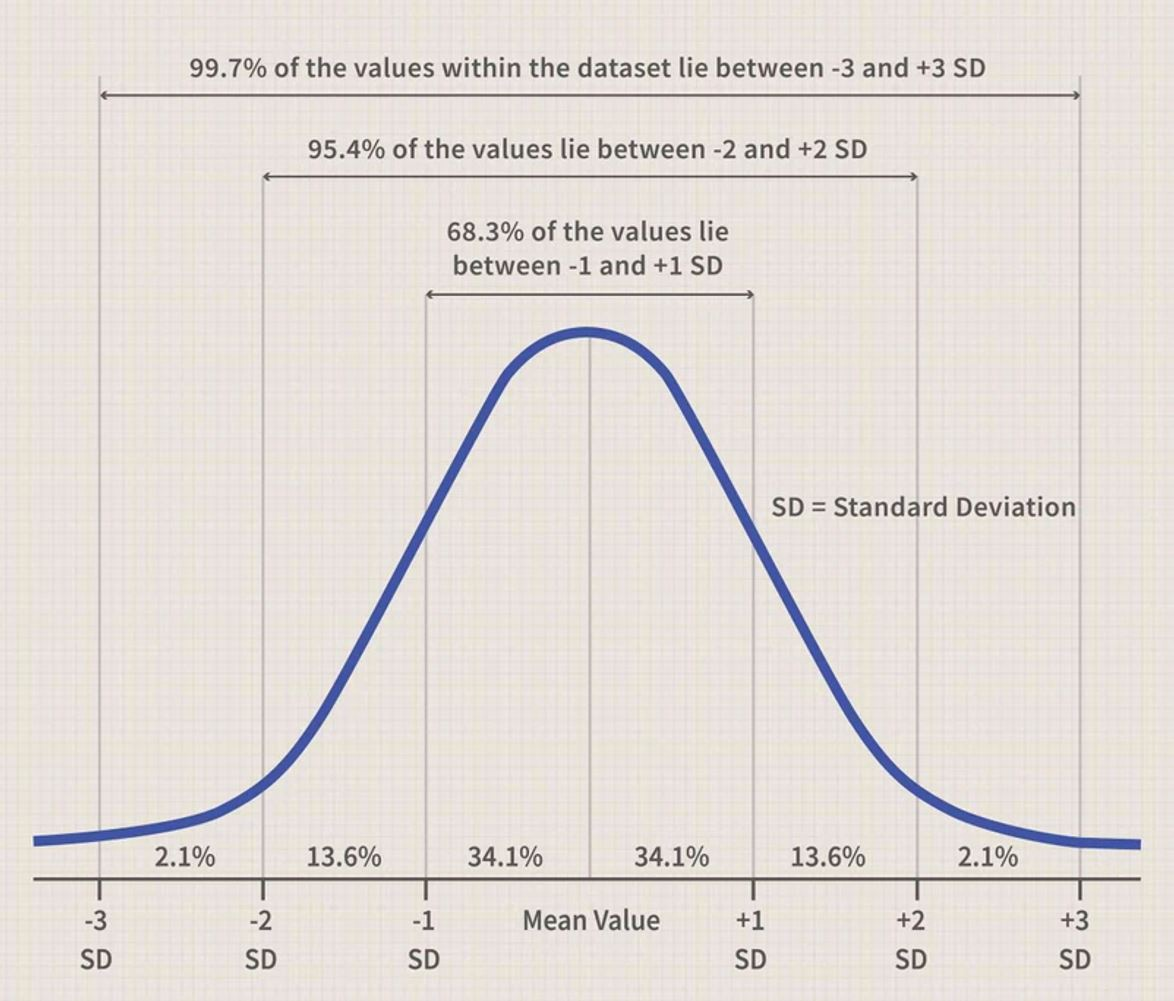

**Interpretation:**
- z = 0: Value is exactly at the mean
- z = 1: Value is 1 standard deviation above the mean
- z = -1: Value is 1 standard deviation below the mean
- z = 2: Value is 2 standard deviations above the mean
- |z| > 3: Extreme outlier (very rare)


In [ ]:
# Identify outlier neurons
firing_rates = [10, 12, 11, 13, 45, 10, 12]  # 45 is weird!
mean = np.mean(firing_rates)
std = np.std(firing_rates)
z_scores = [(x - mean) / std for x in firing_rates]
print(z_scores) 

# 45 Hz has z = 2.8 --> potential outlier!

## t-score

Much like Z-score, t-score also tells us how many standard deviations a value is from the mean, however it does not make assumptions about the standard deviation σ of the underlying normal distribution.

- **Z-score:** Uses population SD - which we rarely know
- **T-score:** Uses sample SD - estimated from the data

Because we're estimating SD, there's extra uncertainty --> t-distribution has heavier tails than normal distribution.

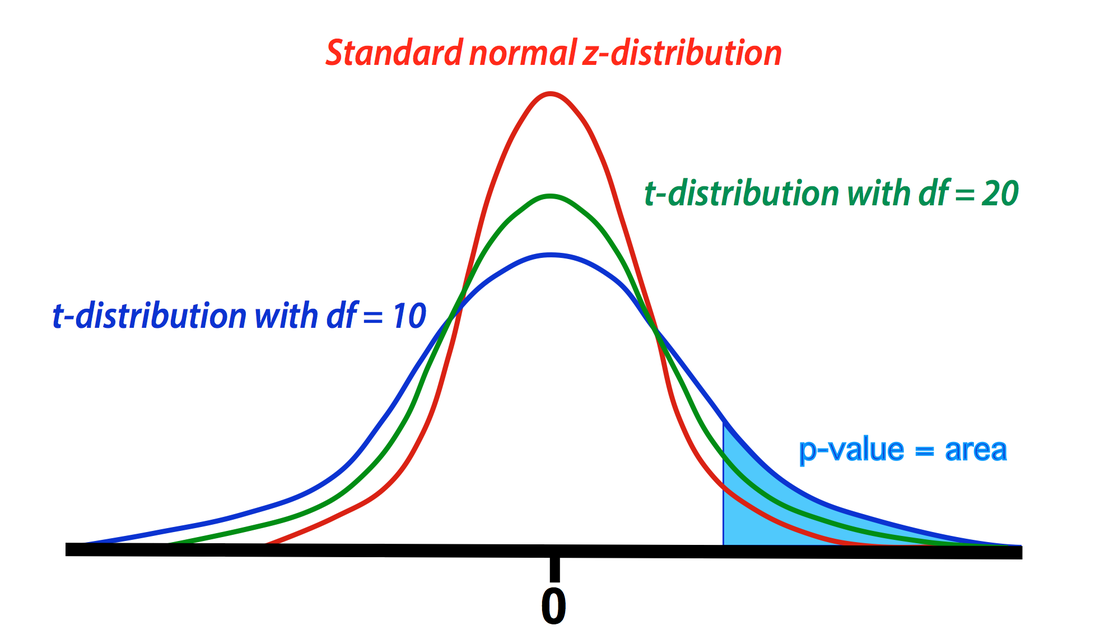

t = (x̄ – μ) / (s / √n)

where:

- x̄ = sample mean or observed value
- μ = hypothesized population mean
- s = sample standard deviation
- n = sample size

**Key Differences between z-score and t-score:**

- Sample Size: Z-test for large samples, t-test for small samples.
- Variance Knowledge: Z-test requires known σ, t-test uses sample standard deviation.
- Distribution Shape: t-distribution has heavier tails, converging to z-distribution as n increases.

**Use Cases:**
- Z-test: Quality control, large surveys, known variance. 
- T-test: Small experiments, pilot studies, unknown variance.

**Tip:** When in doubt and σ is unknown, use the t-distribution — it’s more conservative and valid for small samples.

## F-score

The F-score is a ratio that compares variance between groups to variance within groups. It is used to test if multiple groups have different means.

    F = between-group variance/within-group variance
    
Used when comparing means across three or more groups.

**Interpretation:**

If groups are truly different: 
- Between-group variance is LARGE compared to within-group variance
- F is LARGE 

If groups are the same: 
- Between-group variance = Within-group variance 
- F ≈ 1


An F-test assumes that data are normally distributed and that samples are independent from one another.
Data that differs from the normal distribution could be due to a few reasons. The data could be skewed or the sample size could be too small to reach a normal distribution. Regardless the reason, F-tests assume a normal distribution and will result in inaccurate results if the data differs significantly from this distribution.

F-tests also assume that data points are independent from one another. For example, you are studying a population of giraffes and you want to know how body size and sex are related. You find that females are larger than males, but you didn't take into consideration that substantially more of the adults in the population are female than male. Thus, in your dataset, sex is not independent from age.


Example Question: Do firing rates differ across 4 brain regions?

- Region 1: 8, 10, 9, 11, 12 Hz (mean = 10 Hz)
- Region 2: 13, 15, 14, 16, 17 Hz (mean = 15 Hz) 
- Region 3: 18, 20, 19, 21, 22 Hz (mean = 20 Hz)
- Region 4: 10, 12, 11, 13, 14 Hz (mean = 12 Hz)
- overall mean = 14.25 Hz

Calculate:

Between-group variance (how different are the means?)
- Region 1: 5 × (10 - 14.25)² = 90.3
- Region 2: 5 × (15 - 14.25)² = 2.8
- Region 3: 5 × (20 - 14.25)² = 165.3
- Region 4: 5 × (12 - 14.25)² = 25.3
- Between-group variance = 283.7/3 = 94.6 # Large value = groups are very different from each other

Within-group variance (how much do neurons vary within each region?)
- Region 1: (8-10)² + (10-10)² + (9-10)² + (11-10)² + (12-10)² = 10
- Region 2: ^^^ = 10
- Region 3: ^^^ = 10
- Region 4: ^^^ = 10
- Within-group variance = 40/16 = 2.5 # Small value = neurons within each region are similar to each other

F = Between / Within = 94.6 / 2.5 = 37.84 

Between-group variance is 37.84 times larger than within-group variance --> Very strong evidence that groups differ

df1 = 4 - 1 = 3 (number of groups - 1)
df2 = 16 (total subjects - number of groups)

Look up: F_crit(3, 16, α=0.05) = 3.24
Since 37.84 > 3.24 --> Significant!

Interpretation: "Firing rates differed significantly across brain regions"

In [ ]:
# Your data
region1 = [8, 10, 9, 11, 12]
region2 = [13, 15, 14, 16, 17]
region3 = [18, 20, 19, 21, 22]
region4 = [10, 12, 11, 13, 14]

# One-way ANOVA
F_stat, p_value = stats.f_oneway(region1, region2, region3, region4)

print(f"F-statistic: {F_stat:.2f}")
print(f"P-value: {p_value:.4f}")

### KEY TAKEAWAYS:

**Z-score:** Standardizes values to mean=0, SD=1. Great for comparing different scales.

**T-score:** Like z-score but accounts for uncertainty in estimating SD from sample. Used for hypothesis testing with means.

**F-score:** Ratio of variances. Tests whether group means differ or whether a model explains variance.

All three answer the question: "Is this result unusual, or could it happen by chance?"